Exercice 2:  
Par la suite nous allons refaire la classification sur la base Digits en utilisant un 
classifieur RandomForestClassifier. Comme à l’exercice 1, on sépare les données en gardant 
10% pour l’apprentissage et 90% pour le test.

In [24]:
# Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
import numpy
import tqdm
import seaborn
from sklearn import metrics

In [5]:
digits = load_digits() 
X, y = digits.data, digits.target 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.90)

1. Créer et entrainer votre modèle

In [17]:
clf = RandomForestClassifier(n_estimators=200).fit(X_train,Y_train)

2. Réaliser les prédictions et calculer le score de test

In [18]:
Y_pred = clf.predict(X_test)

metrics.accuracy_score(Y_test, Y_pred)

0.9128553770086527

3. Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même 
nombre d’arbres (200 dans notre cas) ?

In [19]:
clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.9, n_estimators=200).fit(X_train,Y_train)

Y_pred = clf.predict(X_test)

metrics.accuracy_score(Y_test, Y_pred)

0.8856613102595797

On constate que l'accuracy est plus importante pour le RandomForestClassifier pour le même nombre d'arbres

4. Construire la variance de la valeur accuracy sur 100 tirages pour la séparation 
apprentissage/test.  Que  pouvons-nous  conclure  en  comparant  avec  la  séction  précedente 
(bagging) ? 

In [20]:
clf = RandomForestClassifier(n_estimators=200)
accuracy_dtc = []
for i in tqdm.tqdm(range(100)):
    # Construction de l'arbre et évaluation
    clf.fit(X = X_train, y = Y_train)
    accuracy_dtc.append(clf.score(X_test,Y_test))

print(numpy.std(accuracy_dtc))

100%|██████████| 100/100 [00:45<00:00,  2.21it/s]

0.00397120549612077


On constate que l'écart type est encore plus faible. La précision est donc encore plus stable sur ce modèle.

5. Construire  le  graphique accuracy vs n_estimators.  Que  constatez-vous  ?  A  partir  de  quelle 
valeur on n’améliore plus ?

100%|██████████| 499/499 [05:09<00:00,  1.61it/s]


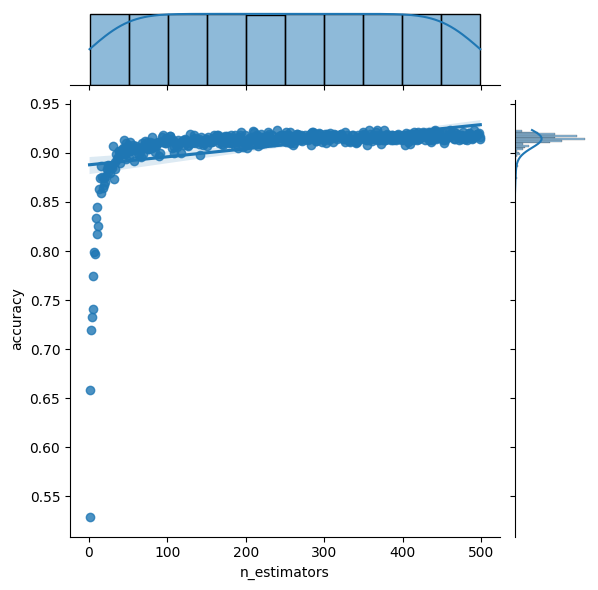

In [22]:
acc_n_esti = []
for i in tqdm.tqdm(range(1,500)):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X = X_train, y = Y_train)
    acc_n_esti.append([i,clf.score(X_test,Y_test)])

acc_n_esti = pandas.DataFrame(acc_n_esti, columns=["n_estimators", "accuracy"])
seaborn.jointplot(x='n_estimators',y='accuracy',data=acc_n_esti,kind='reg')

On constate qu'a partir de 150 n_estimators, la précision moyenne n'augmente plus de façon significative.

6. Regardez  dans  la  documentation  les ExtraTreesClassifier et  refaites  la  classification  avec  ce 
type de classifieur. Comparez avec RandomForestClassifier.

In [25]:
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

accuracy_dtc = []
for i in tqdm.tqdm(range(100)):
    # Construction de l'arbre et évaluation
    clf.fit(X = X_train, y = Y_train)
    accuracy_dtc.append(clf.score(X_test,Y_test))

print(numpy.std(accuracy_dtc))


0.9165636588380717


100%|██████████| 100/100 [01:47<00:00,  1.08s/it]

0.0027696228835985604


On constate une précision équivalente mais une stabilité plus importante